In [1]:
#This tells python to draw the graphs "inline" - in the notebook
%matplotlib inline  
import matplotlib.pyplot as plt
import statsmodels.api as sm
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
import statistics 
import seaborn as sns
from IPython.display import display, Math, Latex, display_latex
import plotly.express as px
import pylab
import pandas as pd
import numpy as np
# make the plots (graphs) a little wider by default
pylab.rcParams['figure.figsize'] = (10., 8.)
sns.set(font_scale=1.5)
sns.set_style("white")

In [2]:
#import wooldridge as woo

from linearmodels import PanelOLS
from linearmodels import RandomEffects
import statsmodels.formula.api as smf
from linearmodels.panel import compare

In [2]:
df=pd.read_csv('./data/regression/HounslowHSyear2.csv')
df.head()

,FID,RC_ID,year,vacancy,ratesmean,ratsmdn,jobdensity
0,0,RC_EW_2067,2010,5.345212,28854.93314,9543.37,0.028881
1,1,RC_EW_2067,2011,5.007825,27114.81097,8483.00,0.021914
2,2,RC_EW_2067,2012,4.353741,25415.24826,8358.25,0.021827
3,3,RC_EW_2067,2013,4.573548,25209.38129,8171.12,0.019096
4,4,RC_EW_2067,2014,6.131550,24439.02045,8171.12,NaN


Text(564.2857142857143, 0.5, 'Average Business Rates')

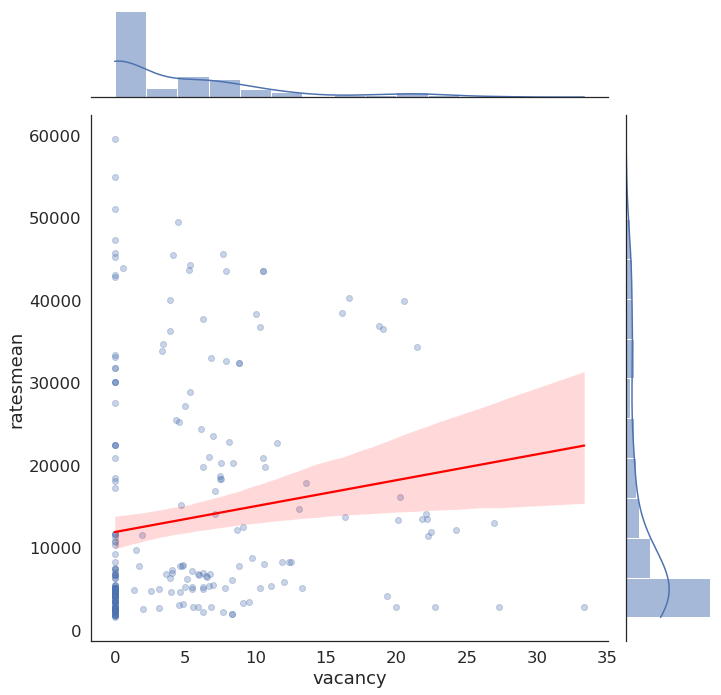

In [4]:
sns.jointplot(data=df, # plot a scatterplot with a regression line and two histograms
                x='vacancy', # set the x axis to be the years of schooling
                y='ratesmean', # set the y axis to be the hourly wage
                kind="reg",  # set the kind of plot to be a regression plot
                scatter_kws=dict(alpha=0.3), # set the transparency of the points to be 0.1 (10%)
                line_kws=dict(color='red'), # set the color of the regression line to red
                height=10) # set the height of the plot to be 10 inches 

plt.xlabel('Vacancy Rate') # add a label to the x axis
plt.ylabel('Average Business Rates') # add a label to the y axis

In [5]:
# log transformation

logVacancy = np.log(df['vacancy'])
df['logVacancy']=logVacancy

logRatesmn = np.log(df['ratesmean'])
df['logRatesmean']=logRatesmn


/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


/opt/conda/lib/python3.10/site-packages/numpy/core/function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
/opt/conda/lib/python3.10/site-packages/numpy/core/function_base.py:161: RuntimeWarning: invalid value encountered in add
  y += start
/opt/conda/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1584: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


Text(564.2857142857143, 0.5, 'Average Business Rates')

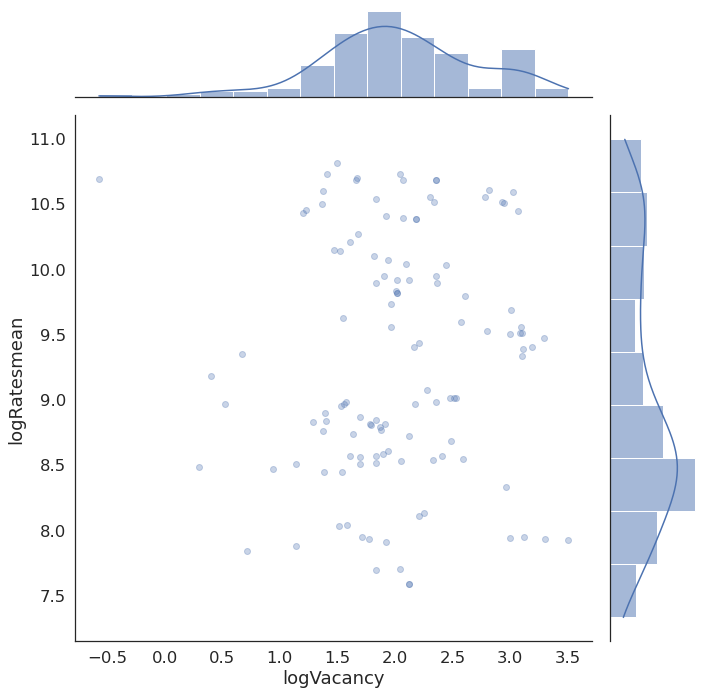

In [6]:
sns.jointplot(data=df, # plot a scatterplot with a regression line and two histograms
                x='logVacancy', # set the x axis to be the years of schooling
                y='logRatesmean', # set the y axis to be the hourly wage
                kind="reg",  # set the kind of plot to be a regression plot
                scatter_kws=dict(alpha=0.3), # set the transparency of the points to be 0.1 (10%)
                line_kws=dict(color='red'), # set the color of the regression line to red
                height=10) # set the height of the plot to be 10 inches 

plt.xlabel('Vacancy Rate') # add a label to the x axis
plt.ylabel('Average Business Rates') # add a label to the y axis

In [7]:
df_job=df[["RC_ID","year","vacancy","jobdensity"]]
df_job= df_job.dropna()
df_job.isnull().sum(axis=0).sort_values(ascending=False)[0:]

RC_ID         0
year          0
vacancy       0
jobdensity    0
dtype: int64

In [8]:
df_job.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 0 to 227
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RC_ID       68 non-null     object 
 1   year        68 non-null     int64  
 2   vacancy     68 non-null     float64
 3   jobdensity  68 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.7+ KB


Text(564.2857142857143, 0.5, 'Job Density')

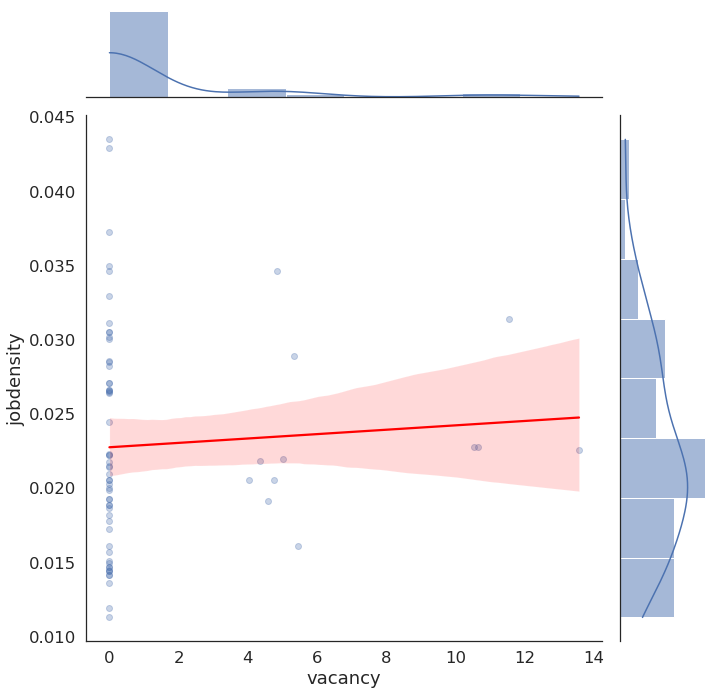

In [9]:
sns.jointplot(data=df_job, # plot a scatterplot with a regression line and two histograms
                x='vacancy', # set the x axis to be the years of schooling
                y='jobdensity', # set the y axis to be the hourly wage
                kind="reg",  # set the kind of plot to be a regression plot
                scatter_kws=dict(alpha=0.3), # set the transparency of the points to be 0.1 (10%)
                line_kws=dict(color='red'), # set the color of the regression line to red
                height=10) # set the height of the plot to be 10 inches 

plt.xlabel('Vacancy Rate') # add a label to the x axis
plt.ylabel('Job Density') # add a label to the y axis

In [7]:

df_c=df.set_index(['RC_ID','year']) # set the index to the county fips code and the year
panel = PanelOLS.from_formula('ratesmn ~ vacancy  + EntityEffects',df_c).fit() # run a fixed effects model
print(compare({'Fixed Effects': panel,}, stars=True)) # print the model formatted as a regression table


           Model Comparison           
                         Fixed Effects
--------------------------------------
Dep. Variable                  ratesmn
Estimator                     PanelOLS
No. Observations                   238
Cov. Est.                   Unadjusted
R-squared                       0.0193
R-Squared (Within)              0.0193
R-Squared (Between)            -0.0438
R-Squared (Overall)            -0.0419
F-statistic                     4.3210
P-value (F-stat)                0.0388
=====================     ============
vacancy                      -95.762**
                             (-2.0787)
======================= ==============
Effects                         Entity
--------------------------------------

T-stats reported in parentheses


In [8]:
print(panel)

                          PanelOLS Estimation Summary                           
Dep. Variable:                ratesmn   R-squared:                        0.0193
Estimator:                   PanelOLS   R-squared (Between):             -0.0438
No. Observations:                 238   R-squared (Within):               0.0193
Date:                Tue, Aug 01 2023   R-squared (Overall):             -0.0419
Time:                        16:36:30   Log-likelihood                   -2265.3
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      4.3210
Entities:                          17   P-value                           0.0388
Avg Obs:                       14.000   Distribution:                   F(1,220)
Min Obs:                       14.000                                           
Max Obs:                       14.000   F-statistic (robust):             4.3210
                            

In [9]:
panel2 = PanelOLS.from_formula('ratesmn ~ vacancy  + TimeEffects',df_c).fit() # run a fixed effects model
print(compare({'Fixed Effects': panel2,}, stars=True)) # print the model formatted as a regression table

           Model Comparison           
                         Fixed Effects
--------------------------------------
Dep. Variable                  ratesmn
Estimator                     PanelOLS
No. Observations                   238
Cov. Est.                   Unadjusted
R-squared                       0.0330
R-Squared (Within)             -0.5286
R-Squared (Between)             0.1646
R-Squared (Overall)             0.1436
F-statistic                     7.6142
P-value (F-stat)                0.0063
=====================     ============
vacancy                      414.94***
                              (2.7594)
======================= ==============
Effects                           Time
--------------------------------------

T-stats reported in parentheses


In [10]:
print(panel2)

                          PanelOLS Estimation Summary                           
Dep. Variable:                ratesmn   R-squared:                        0.0330
Estimator:                   PanelOLS   R-squared (Between):              0.1646
No. Observations:                 238   R-squared (Within):              -0.5286
Date:                Tue, Aug 01 2023   R-squared (Overall):              0.1436
Time:                        16:36:30   Log-likelihood                   -2599.2
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      7.6142
Entities:                          17   P-value                           0.0063
Avg Obs:                       14.000   Distribution:                   F(1,223)
Min Obs:                       14.000                                           
Max Obs:                       14.000   F-statistic (robust):             7.6142
                            

In [11]:
residuals = panel.resid # get the residuals

# make the figure wider
plt.rcParams["figure.figsize"] = [20, 10]

f, axes = plt.subplots(1, 2)
sns.histplot(residuals, kde=True, ax=axes[0]) # plot the residuals
axes[0].set_title('Histogram of Residuals') # add a title

sm.qqplot(residuals, line='45', fit=True,  ax=axes[1]) # plot the residuals
axes[1].set_title('Q-Q Plot') # add a title

plt.show() # show the plot

AttributeError: 'PanelEffectsResults' object has no attribute 'resid'